># Regression Analysis Of Abalone Data Set With Linear Regression , Polynomial Regression , LASSO & Ridge Regression.
>>##### By - Saif Ali Ahmad
>>## What is Abalone ?
Abalone  is a common name for any of a group of small to very large sea snails, marine gastropod molluscs in the                family Haliotidae.<br>
<br>
>>## Data Set Information:
Predicting the age of abalone from physical measurements. The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.<br>
<br>
>>## Attribute Information:
Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict: either as a continuous value or as a classification problem.<br> 
<br>
>>## Name/Data Type/Measurement Unit/Description:
Sex / nominal / -- / M, F, and I (infant) <br>
Length / continuous / mm / Longest shell measurement <br>
Diameter	/ continuous / mm / perpendicular to length <br>
Height / continuous / mm / with meat in shell <br>
Whole weight / continuous / grams / whole abalone <br>
Shucked weight / continuous	/ grams / weight of meat <br>
Viscera weight / continuous / grams / gut weight (after bleeding) <br>
Shell weight / continuous / grams / after being dried <br>
Rings / integer / -- / +1.5 gives the age in years <br>
<br>
>#### URL For Data Set -  http://archive.ics.uci.edu/ml/datasets/Abalone?pagewanted=all

In [1]:
# Importing the Important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('ggplot')
%matplotlib inline

C:\Users\saif\Anaconda3\envs\tensorflow\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
C:\Users\saif\Anaconda3\envs\tensorflow\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## Importing the Data Set & Performing the EDA

In [2]:
# Name Of Feature Columns
columns_name = ['Sex','Length','Diameter','Height','Whole Weight','Shucked Weight','Viscera Weight','Shell Weight','Rings']

In [3]:
# Importing the Dataset with Pandas
dataset = pd.read_csv(filepath_or_buffer='Abalone_Dataset.csv' , names= columns_name)
# Printing Shape of Dataset
print('Shape Of Dataset : ',dataset.shape)
dataset.head()

Shape Of Dataset :  (4177, 9)


,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
# Finding if NA exist in Dataset
dataset.isna().any(axis=0)

Sex               False
Length            False
Diameter          False
Height            False
Whole Weight      False
Shucked Weight    False
Viscera Weight    False
Shell Weight      False
Rings             False
dtype: bool

In [5]:
# Displaying the Data types in the Dataset
dataset.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole Weight      float64
Shucked Weight    float64
Viscera Weight    float64
Shell Weight      float64
Rings               int64
dtype: object

In [6]:
# Finding Different Values Of Rings and their frequency in the Dataset
dataset.Rings.value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

In [7]:
# Types of Gender and their Frequency
dataset.Sex.value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [8]:
# Statistical Discription of Data Set
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Whole Weight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Shucked Weight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Viscera Weight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Shell Weight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
Rings,4177.0,9.933684,3.224169,1.0000,8.0000,9.0000,11.000,29.0000


>Here the height attribute has minimum value of Zero which is not possible, so we will impute suitable value for it.

In [9]:
# finding Rows with height Zero
dataset[dataset['Height']==0]

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


> All zero height belong to Infants

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
Sex,,,,,,,,
F,0.579,0.455,0.158,1.047,0.446,0.231,0.302,11.129
I,0.428,0.326,0.108,0.431,0.191,0.092,0.128,7.890
M,0.561,0.439,0.151,0.991,0.433,0.216,0.282,10.705


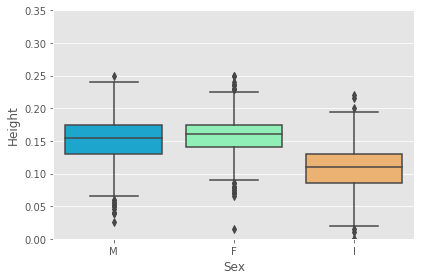

In [10]:
# Finding the mean values of attributes according to 'Sex' by panda's groupby method
display(dataset.groupby('Sex').mean().round(3))
# Plotting the boxplot of height 
sns.boxplot(x='Sex' , y ='Height' ,data = dataset,palette='rainbow')
plt.ylim([0,0.35])
plt.tight_layout()

> Here we find the mean value for Infant to be 0.108 

In [11]:
# finding index of rows with Zero 
height_zero_index = list(dataset[dataset['Height']==0].index)
height_zero_index 

[1257, 3996]

In [12]:
# replacing the the values of height column having height Zero with mean
dataset.loc[height_zero_index , 'Height'] = 0.108

In [13]:
dataset.loc[height_zero_index  , :]

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
1257,I,0.430,0.34,0.108,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.108,0.134,0.0575,0.0285,0.3505,6


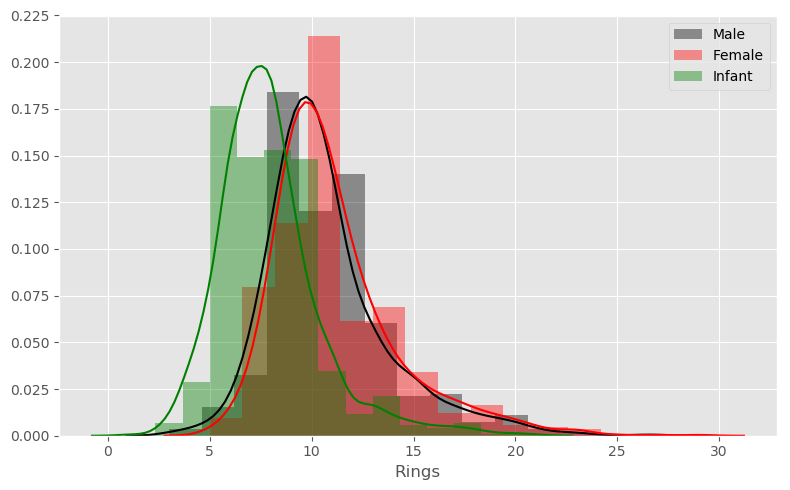

In [14]:
# Plotting Distribution Plots of Ring attribute for different Sex.
fig , ax = plt.subplots(nrows=1,ncols=1,figsize=(8,5),dpi=100)
sns.distplot(dataset[dataset['Sex']=='M'].Rings,bins=15,label='Male',color='k',hist=True)
sns.distplot(dataset[dataset['Sex']=='F'].Rings,bins=15,label='Female',color='r',hist=True)
sns.distplot(dataset[dataset['Sex']=='I'].Rings,bins=15,label='Infant',color='g',hist=True)
plt.legend()
plt.tight_layout()

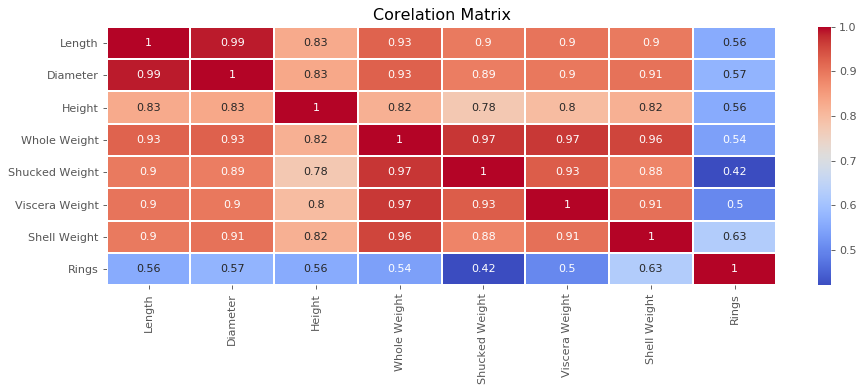

In [15]:
# Finding the Corelation
corr = dataset.drop(columns='Sex').corr()
#Plotting the Corelation Matrix
f , ax = plt.subplots(figsize=(12,5),dpi=80)
sns.heatmap(corr,ax=ax,annot=True,linecolor='white',cmap='coolwarm',linewidths='1')
ax.set_title('Corelation Matrix')
plt.tight_layout()

# Data Prepocessing

In [16]:
# Creating Dummy variables for the categorical variable Sex
data        = pd.get_dummies(data=dataset,columns=['Sex'],drop_first=True)
data.head()

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,1,0


In [17]:
# Creating Variables X & y 
X=data.drop(columns=['Rings']).values
y=data['Rings'].values

In [18]:
# printing the shape of variable X & y
print('Shape of X : {}  ;  dtype of X : {}'.format(X.shape,X.dtype))
print('Array X :-')
display(X)
print('\n----------------------------------------------------------\n')
print('Shape of y : {}  ;  dtype of y : {}'.format(y.shape,y.dtype))
print('Array y :-')
display(y)

Shape of X : (4177, 9)  ;  dtype of X : float64
Array X :-


array([[0.455, 0.365, 0.095, ..., 0.15 , 0.   , 1.   ],
       [0.35 , 0.265, 0.09 , ..., 0.07 , 0.   , 1.   ],
       [0.53 , 0.42 , 0.135, ..., 0.21 , 0.   , 0.   ],
       ...,
       [0.6  , 0.475, 0.205, ..., 0.308, 0.   , 1.   ],
       [0.625, 0.485, 0.15 , ..., 0.296, 0.   , 0.   ],
       [0.71 , 0.555, 0.195, ..., 0.495, 0.   , 1.   ]])


----------------------------------------------------------

Shape of y : (4177,)  ;  dtype of y : int64
Array y :-


array([15,  7,  9, ...,  9, 10, 12], dtype=int64)

In [19]:
# Shuffling and spliting the dataset into train & test set
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
X,y = shuffle(X,y,random_state=1)
X_train , X_test , y_train , y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
# printing the shape of test & train set variables
print('X_train shape : {}   ;   y_train shape : {}'.format(X_train.shape,y_train.shape))
print('X_test  shape : {}    ;   y_test  shape : {}'.format(X_test.shape , y_test.shape))

X_train shape : (3341, 9)   ;   y_train shape : (3341,)
X_test  shape : (836, 9)    ;   y_test  shape : (836,)


In [21]:
# viewing X_train and y_train
print('X_train - ')
display(X_train)

print('y_train - ')
display(y_train)

X_train - 


array([[0.65  , 0.495 , 0.155 , ..., 0.335 , 0.    , 0.    ],
       [0.665 , 0.505 , 0.16  , ..., 0.3665, 0.    , 1.    ],
       [0.535 , 0.42  , 0.145 , ..., 0.25  , 0.    , 1.    ],
       ...,
       [0.435 , 0.315 , 0.11  , ..., 0.12  , 1.    , 0.    ],
       [0.59  , 0.475 , 0.165 , ..., 0.3095, 0.    , 1.    ],
       [0.575 , 0.45  , 0.16  , ..., 0.33  , 0.    , 0.    ]])

y_train - 


array([ 9, 11, 10, ...,  7,  9, 12], dtype=int64)

>## Defining the function 'graph_plotter'
>> graph_plotter function will be used for plotting the Predicted values against Orignal Values & calculating and displaying the MSE , MAE & $R^2$ Values.

In [22]:
#stats_info dataframe will be used to store mse,mae,R-square values of different models
stats_info = pd.DataFrame(index=['MSE','MAE','R-Sq'])
def graph_plotter(y_test,y_pred,regressor_name):
    
    # importing the required libraries
    from sklearn.metrics import r2_score,mean_absolute_error ,mean_squared_error
    
    # Calculating the r2
    r2  = r2_score(y_test,y_pred)
    # Calculating the Mean Absulute Error
    mae = mean_absolute_error(y_test,y_pred)
    # Calculating the Mean Squared Error
    mse = mean_squared_error(y_test,y_pred)
    # Adding the mse,mae & R-square in the stats_info dataframe
    stats_info[regressor_name] = [mse,mae,r2]
    #Calculating the min and max value of y_test,y_pred
    min_value = min(y_test.min() , y_pred.min())
    max_value = max(y_test.max() , y_pred.max())
    
    # Plotting the graph
    fig , axis = plt.subplots(nrows=1, ncols=1,figsize = (6,6),dpi=100)
    sns.scatterplot(y_test,y_pred,color='r',label= 'Predicted Values',alpha=0.7)
    axis.plot([min_value,max_value],[min_value,max_value],'k',label= 'Perfect Prediction')
    axis.set_xlabel('Actual Values Of Rings')
    axis.set_ylabel('Predicted Values Of Rings')
    axis.set_xlim([0,max_value+1])
    axis.set_ylim([0,max_value+1])
    axis.set_title('"y_test"  Vs  "y_pred"  plot for '+str(regressor_name))
    style = dict(boxstyle='round', facecolor='0.7', alpha=0.6)
    textStr = '$MAE=%.3f$\n$MSE=%0.3f$\n$R^2=%.3f$' % (mae,mse,r2)
    axis.text(0.5, 20, textStr,fontsize=13, bbox=style)

    plt.legend(facecolor = '0.75')
    plt.tight_layout()

# Regression Analysis

>## Linear Regression

In [23]:
# From sklearn's linear model importing LinearRegression
from sklearn.linear_model import LinearRegression
# creating object of LinearRegression class & fitting the train_set in it.
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
# Calculating the Predicted value on test_set
lin_pred = lin_reg.predict(X_test)

In [25]:
# printing the coefficient of lin_reg
coef_names = list(data.drop(columns=['Rings']).columns)
dict(zip(coef_names,lin_reg.coef_))

{'Diameter': 11.687466055107256,
 'Height': 9.455673282249041,
 'Length': -0.5428174363751905,
 'Sex_I': -0.8331842127065182,
 'Sex_M': 0.05559613738072722,
 'Shell Weight': 8.180135307632387,
 'Shucked Weight': -19.678425674299497,
 'Viscera Weight': -10.559045944239854,
 'Whole Weight': 9.009840994442401}

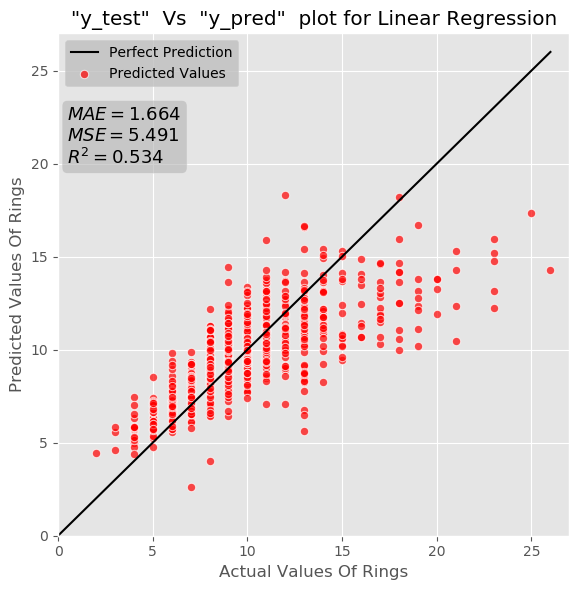

In [26]:
# using the graph_plotter function for linear regression
graph_plotter(y_test=y_test,y_pred=lin_pred,regressor_name='Linear Regression')

> Here we find that the MSE & MAE values are quite high (ideally MSE should be close to zero),therefore Linear Regression is not a good option , So in the next section we will try Polynomial Regression & we will see if it performs better than Linear Regression or not.

>## Polynomial Regression

In [27]:
# From sklearn's preprocessing importing PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures
# creating object of PolynomialFeatures class & fitting the train_set in it.
poly_features  = PolynomialFeatures(degree = 2) 
x_train_poly   = poly_features.fit_transform(X_train)
# transforming the test_set 
x_test_poly    = poly_features.transform(X_test)

In [28]:
# printing the shape of x_train_poly & x_test_poly
print('X_train_poly Shape - ',x_train_poly.shape)
print('X_test_poly Shape  - ',x_test_poly.shape)

X_train_poly Shape -  (3341, 55)
X_test_poly Shape  -  (836, 55)


In [29]:
# creating the LinearRegression model & fitting the LinearRegression model on x_train_poly
from sklearn.linear_model import LinearRegression
poly_reg = LinearRegression()
poly_reg.fit(x_train_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
# getting the predicted value on x_test_poly
poly_pred = poly_reg.predict(x_test_poly)

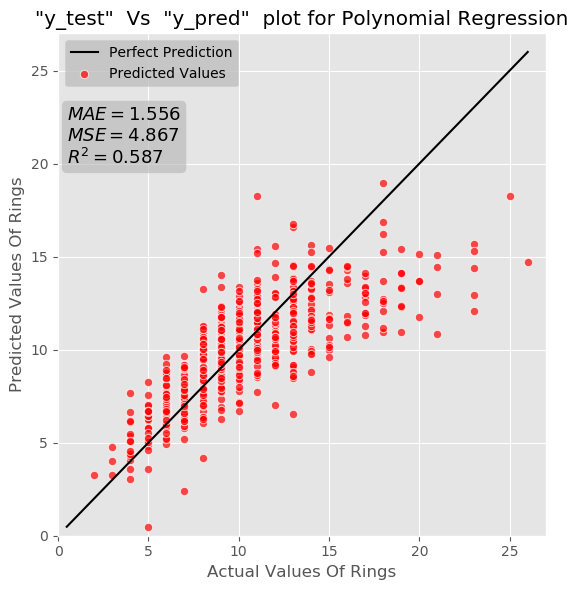

In [31]:
# using the graph_plotter function for polynomial regression
graph_plotter(y_test= y_test, y_pred= poly_pred, regressor_name= 'Polynomial Regression')

> Clearly Polynomial Regression has performed beter than Linear Regression , but still the MSE is quite high , & number of features have increased from 9 to 55.<br>
Now we wll try Ridge & LASSO to find out,if we can reduce the dimensions of data set from 55 to lower value & get a better MSE.

>## Ridge Regression

In [32]:
# from sklearns linear_model importing Ridge
from sklearn.linear_model import Ridge
# creating object of Ridge Class & fitting the x_train_poly
poly_ridge = Ridge(alpha=0.0001 ,normalize=False)
poly_ridge.fit(x_train_poly,y_train)

Ridge(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [33]:
# finding number of coefficient with zero and non-zero value
print('Number Of Coefficient with Zero Value     = ',(poly_ridge.coef_==0).sum())
print('Number Of Coefficient with Non-Zero Value = ',(poly_ridge.coef_!=0).sum())

Number Of Coefficient with Zero Value     =  2
Number Of Coefficient with Non-Zero Value =  53


In [34]:
# finding predicted value on x_test_poly
poly_ridge_pred = poly_ridge.predict(x_test_poly)

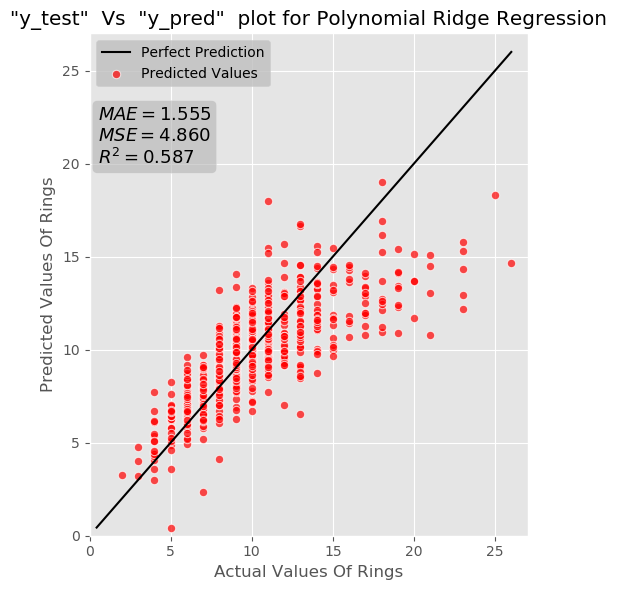

In [35]:
# using the graph_plotter function for polynomial ridge regression
graph_plotter(y_test=y_test,y_pred=poly_ridge_pred,regressor_name='Polynomial Ridge Regression')

>Ridge Regression has performed slightly better than Polynomial Regression & it has also reduced the dimension of dataset from 55 to 53, but still both the MSE and the Dimension of the Data set is high.<br> 
Now , we will try LASSO to find out ,if it can give us better result than Ridge.

>## LASSO Regression

In [36]:
# from sklearns linear_model importing Lasso
from sklearn.linear_model import Lasso
# creating object of Lasso Class & fitting the x_train_poly
poly_lasso = Lasso(alpha=0.000168 ,normalize=False)
poly_lasso.fit(x_train_poly,y_train)

C:\Users\saif\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=0.000168, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [37]:
# finding number of coefficient with zero and non-zero value
print('Number Of Coefficient with Zero Value     = ',(poly_lasso.coef_==0).sum())
print('Number Of Coefficient with Non-Zero Value = ',(poly_lasso.coef_!=0).sum())

Number Of Coefficient with Zero Value     =  17
Number Of Coefficient with Non-Zero Value =  38


In [38]:
# finding predicted value on x_test_poly
poly_lasso_pred = poly_lasso.predict(x_test_poly)

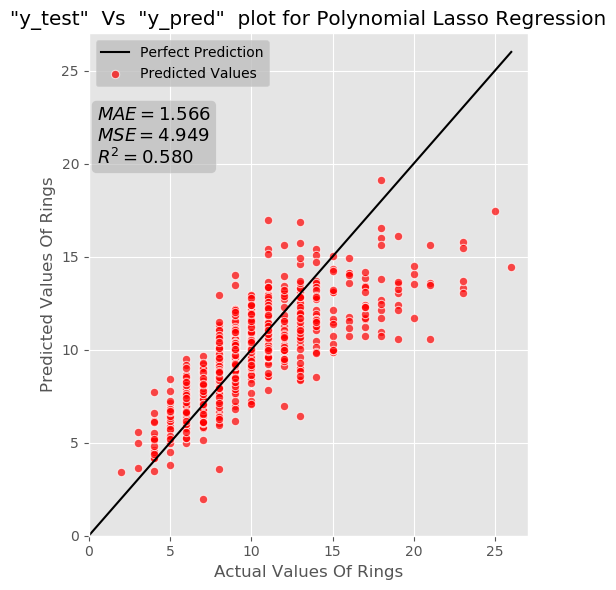

In [39]:
# using the graph_plotter function for polynomial lasso regression
graph_plotter(y_test=y_test,y_pred=poly_lasso_pred,regressor_name='Polynomial Lasso Regression')

> LASSO regression has performed similar to Ridge , its MSE is slightly higher than Ridge but it has reduced the dimension of dataset to 38 from 55.<br>
But still MSE is quite high.


## Evaluation of Performance of Different Models. 

In [40]:
#Displaying the stats_info datafame containing mse,mae & R-square values of different models
display(stats_info.round(3))

,Linear Regression,Polynomial Regression,Polynomial Ridge Regression,Polynomial Lasso Regression
MSE,5.491,4.867,4.860,4.949
MAE,1.664,1.556,1.555,1.566
R-Sq,0.534,0.587,0.587,0.580


># Conclusion -
>> * We analysed the Abalone Data set with different Regression Models i.e Linear,Polynomial,Polynomial-LASSO & Polynomial-Ridge. Among all the models, Polynomial-Ridge and Polynomial-LASSO models have performed better but still their MSE is quite high.<br>
<br>
>>* Since the MSE of all the models are quite high , therefore we will not be able to predict the number of 'Rings' in Abalone correctly, so we have to rely on manual methods to measure the rings of Abalone